### ELiminacion Gaussiana

In [15]:
function [A,b]=eliminacionGauss(A,b) %Este programa calcula la matriz escalonada equivalente por filas a la matriz A
[n,m]=size(A);
for j=1:m-1
    for i=j+1:n
        mult=A(i,j)/A(j,j);  %calculo del multiplicador
        for k=j:m
        A(i,k)=A(i,k)-mult*A(j,k);
        end
        b(i)=b(i)-mult*b(j);
    end
end
end

In [2]:
function x=sustitucionAtras(U,b)
n=length(b);
x(n+1)=0;
for k=n:-1:1
    suma=0;
    for j=k+1:n
        suma=suma+U(k,j)*x(j);
    end
    x(k)=(b(k)-suma)/U(k,k);
end
x=x(1,1:n)'
endfunction

In [24]:
function x=sustitucionAdelante(U,b)
n=length(b);
x(n+1)=0;
for k=1:1:n
    suma=0;
    for j=1:k-1
        suma=suma+U(k,j)*x(j)
    end
    x(k)=(b(k)-suma)/U(k,k)
end
x=x(1,1:n)';
endfunction

Ejemplo 1

In [26]:
A=[2 0 0
-1 1 0
3 2 -1];

b=[-1 3 0];

x=sustitucionAdelante(A,b)

x =

  -0.50000   0.00000   0.00000   0.00000

suma =  0.50000
x =

  -0.50000   2.50000   0.00000   0.00000

suma = -1.5000
suma =  3.5000
x =

  -0.50000   2.50000   3.50000   0.00000

x =

  -0.50000
   2.50000
   3.50000



### Factorizacion LU
parcial y 
No vimos cholesky
Use la factorizacion de LU para resolver n sistemas que le permitan hayar la solucion

Use la inversa de 

In [ ]:
function pb=cal_pivo(b,p)
n = length(p);
    for k=1:n
        pb(k)=b(p(k));
    endfor
end

In [ ]:
function [A,p] = fac_LU_piv(A)
n = length(A);
for k=1:n
    p(k)=k;
end

for k = 1:n-1
    % pivoteo parcial
    pv=abs(A(k,k));
    r=k;
    for(i=k:n)
        if(abs(A(i,k)>pv))
	    pv=	abs(A(i,k));
            r=i;
        end
    end
    if pv==0
        sprintf('la matriz es singular')
        break
    end
    if r~=k
        aux=p(k);
        p(k)=p(r);
        p(r)=aux;
        for(j=1:n)
            tem=A(k,j)
            A(k,j)=A(r,j);
            A(r,j)=tem;
        end
    end
    % Elimination phase
    for i= k+1:n
        if A(i,k) ~= 0
        lambda = A(i,k)/A(k,k);
        A(i,k+1:n) = A(i,k+1:n) - lambda*A(k,k+1:n);
        A(i,k)=lambda;
        
        end
    end
    if A(k,k)==0
        sprintf('la matriz es singular ')
        break
    end
end


Matrices definidas positivas

In [5]:
function [sol,iteraciones,error]=jacobi(A,b,x0,tol,N)

D=diag(diag(A));
B=A-D;
Dinv=diag(1./diag(A));
k=1;

x1=Dinv*(b-B*x0);

for k=1:N
    x0=x1;
    x1=Dinv*(b-B*x0);
    if norm(x1-x0)<tol
        break
    end
end
if k==N
    disp('Alcanzó el número máximo de iteraciones')
end

sol=x1;
iteraciones=k;
error=norm(x1-x0,2);
end

In [6]:
function [sol,iteraciones,error]=gauss_seidel(A,b,x0,tol,N)

D=diag(diag(A));
L=tril(A);#No se resto el D, por lo que ya tiene sumada(L+D)
U=triu(A)-D;
Linv=diag(1./diag(L));
k=1;

x1=Dinv*(b-U*x0);

for k=1:N-1
    x0=x1;
    x1=Dinv*(b-U*x0);
    if norm(x1-x0)<tol
        break
    end
end
if k==N-1
    disp('Alcanzó el número máximo de iteraciones')
end

sol=x1;
iteraciones=k+1;
error=norm(x1-x0,2);
end

# Interpolacion

primeras cantidades seran distintas /
tengo n+1 puntos/
solo existe 1 unico polinomio/
de grado n/

----/
Si la matriz es mal condicionada el mas minimo cambio, implicaria grandes errores en la solucion/

In [115]:
function c = newtondd(x,y)
    n=length(x);
    v=zeros(n);
    for j=1:n
        v(j,1)= y(j); 
    end
    for i=2:n ,
        for j =1: n + 1- i 
            v(j,i)=(v (j+ 1,i-1)-v(j,i-1))/(x(j+ i-1)-x(j));
        end
    end
    for i=1:n
        c(i)= v(1,i);%considera los coeficientes del polinomio como la parte superior del triángulo
    end
end

### Tarea en progreso

In [116]:
function resultado = interpolacionNewton(vectorN,x,vectorV)
    vectorInterpolacion=[];
    for v=1:length(vectorV);
        suma=vectorN(1);
        for n= 2:length(vectorN)%vectorN=[ -1 2 0 0]; length(vectorN)=4 va de 2 a 4 porque (v-vectorN(n)) inicia en el segundo elemento de la suma ej: -1{primer elemento}+ 2(x-0){segundo elemento}+ ...] 
            if n!=0
                suma+=vectorN(n).*(vectorV(v)-x(n-1));
            endif
        endfor
        vectorInterpolacion(end+1)=suma;
    endfor
    resultado=vectorInterpolacion;
endfunction

  -1   2  -0   0


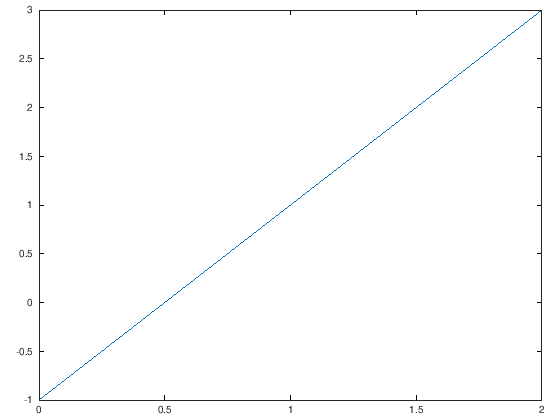

In [117]:
%x=linspace(0,pi/2,4);
%y=sin(x);

x=[0 2 -1 1/2];
y=[-1 3 -3 0];

vectorN=newtondd(x,y);
disp(n)

vectorV=[];
vectorV=linspace(0,2,100);
vectorInterpolacion=interpolacionNewton(vectorN,x,vectorV);

plot(vectorV,vectorInterpolacion)

In [93]:
pkg load symbolic
syms xe

f(x)=x.^2+3;

disp(f)

error: invalid indices: should be integers or boolean
error: called from
    subsasgn at line 97 column 13
   2
  x 


In [55]:
x=[1 2 4 5]
y=[2 1 4 3]

function ans = eval(v,n,x,xe)
    
endfunction

x =

   1   2   4   5

y =

   2   1   4   3



In [ ]:
Interpolacion
No Deben estar los puntos ordenados
No Deben estar espaciadas

OJO buscar!!!
Splines
SPlines Cubicos

Estar en orden los puntos
No deben estar igualmente espaciados

fenomeno de runge(muchos puntos)

Condiciones Naturales